
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [1]:
# Load the four libraries with their aliases 

import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns             




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [3]:
# Load the file as a dataframe 

import io
from google.colab import files
uploaded=files.upload()

#movies = pd.read_csv(io.BytesIO(uploaded['moviesData.csv']))
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (2).csv


In [4]:
# Print the first ten rows of df
df.head(10)
movies.head(10)

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover
5,6,Old Partner,Documentary,Documentary,78.0,Unrated,Shcalo Media Group,2009,1,15,2010.0,4.0,20.0,7.8,333,Fresh,91,Upright,86,no,no,no,no,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NaN,NaN
6,7,Lady Jane,Feature Film,Drama,142.0,PG-13,Paramount Home Video,1986,1,1,2003.0,2.0,18.0,7.2,5016,Rotten,57,Upright,76,no,no,no,no,no,no,Trevor Nunn,Cary Elwes,John Wood,Michael Hordern,Jill Bennett II,Helena Bonham Carter
7,8,Mad Dog Time,Feature Film,Drama,93.0,R,MGM/United Artists,1996,11,8,2004.0,3.0,2.0,5.5,2272,Rotten,17,Spilled,47,no,no,yes,no,no,no,Larry Bishop,Richard Dreyfuss,Jeff Goldblum,Gabriel Byrne,Ellen Barkin,Diane Lane
8,9,Beauty Is Embarrassing,Documentary,Documentary,88.0,Unrated,Independent Pictures,2012,9,7,2013.0,1.0,21.0,7.5,880,Fresh,90,Upright,89,no,no,no,no,no,no,Neil Berkeley,Paul Reubens,Matt Groening,Todd Oldham,Jonathan Dayton,Cliff Benjamin
9,10,The Snowtown Murders,Feature Film,Drama,119.0,Unrated,IFC Films,2012,3,2,2012.0,8.0,14.0,6.6,12496,Certified Fresh,83,Upright,66,no,no,no,no,no,no,Justin Kurzel,Lucas Pittaway,Daniel Henshall,Louise Harris,Craig Coyne,Richard Green


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [5]:
# Print the first five rows of MonthlyRate
print(df["MonthlyRate"].head(5))

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64


In [0]:
# Find the details of MonthlyRate 
print(df["MonthlyRate"].describe())

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [6]:
# Check for missing values 
df.isna()

# Drop the missing values 
df.dropna()

# Print the size of df after dropping 
print(df.size)
print(df.shape)


34952
(1028, 34)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [7]:
# Add a column named MonthRateNew 

mmean = df["MonthlyRate"].mean()
sstd = df["MonthlyRate"].std()
MonthlyRateNew = (df["MonthlyRate"] - mmean) / sstd
print(MonthlyRateNew)
df.head(2)
#df.insert(34,"MonthlyRateNew", MonthlyRateNew)
df.head(2)

0       0.742749
1       1.512813
2      -1.680795
3       1.264827
4       0.338849
          ...   
1023   -0.531941
1024    1.767609
1025    0.137254
1026    1.290930
1027   -1.494663
Name: MonthlyRate, Length: 1028, dtype: float64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1


### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [8]:
from sklearn.impute import SimpleImputer
# Check for missing values 
print(movies.isna().values.sum())
# Drop the missing values 
print(movies.shape)
print(movies.size)
print(movies.columns[movies.isnull().any()])
# Replace the missing values 
# You can use SimpleImputer of sklearn for this

movies.fillna(movies.mean(), inplace=True)
print(movies.isna().values.sum())


73
(600, 31)
18600
Index(['runtime', 'studio', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day',
       'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5'],
      dtype='object')
51


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

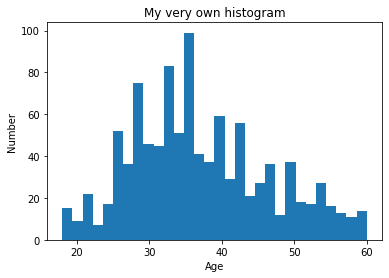

In [16]:
# Plot and modify the histogram of Age
df.head(10)
x = df["Age"]

plt.hist(x, bins=30)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('My very own histogram')
plt.show()
# Draw a scatter plot between Age and Attrition




Text(0, 0.5, 'Attrition')

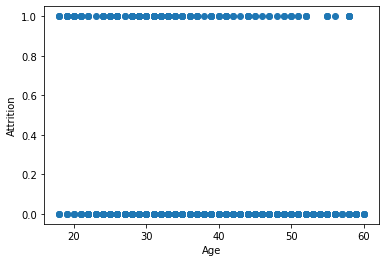

In [17]:
X = df["Age"]
Y = df["Attrition"]
plt.scatter(X,Y)
plt.xlabel('Age')
plt.ylabel('Attrition')

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


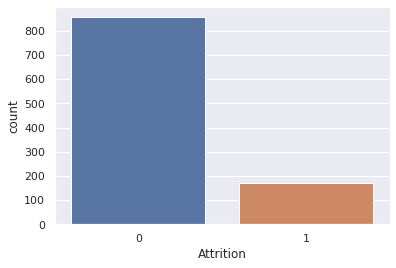

In [24]:
# Get a series of counts of values of Attrition

series_attr = df["Attrition"].value_counts()
print(series_attr)
print(df['Attrition'].head())
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.set(style="darkgrid")
sns.countplot(x="Attrition", data=df)
plt.show()



### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

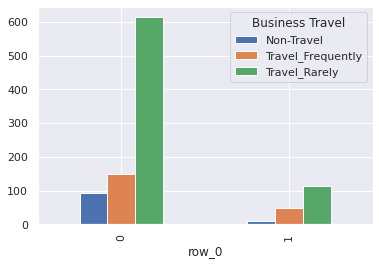

In [27]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
a = np.array(df["Attrition"])
b = np.array(df["BusinessTravel"])
pd.crosstab(a,b)
bct = pd.crosstab(a,b)
bct.plot.bar()
plt.legend(title="Business Travel")
plt.show()


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

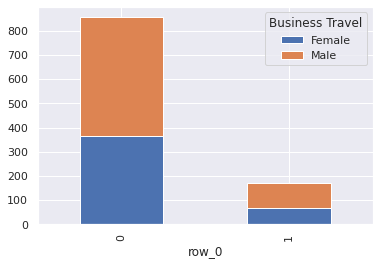

In [28]:
# Draw a stacked bar chart between Attrition and Gender 

a = np.array(df["Attrition"])
b = np.array(df["Gender"])
pd.crosstab(a,b)
bct = pd.crosstab(a,b)
bct.plot.bar(stacked=True)
plt.legend(title="Business Travel")
plt.show()

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

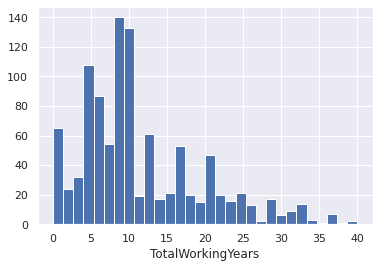

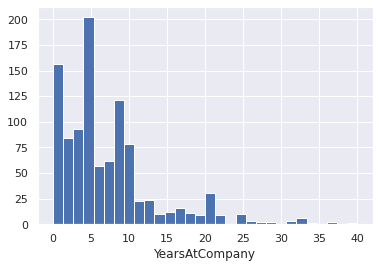

In [29]:
# Draw a histogram of TotalWorkingYears with 30 bins

x = df["TotalWorkingYears"]

plt.hist(x, bins=30)
plt.xlabel('TotalWorkingYears')


plt.show()

# Draw a histogram of YearsAtCompany


x = df["YearsAtCompany"]

plt.hist(x, bins=30)
plt.xlabel('YearsAtCompany')


plt.show()

### Visualize the ```df``` by drawing the following boxplot:




* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


array([19094, 18947, 19545, 18740, 18844, 18172, 19537, 19926, 19033,
       18722, 19999, 19232, 19517, 19068, 19202, 19436, 19045, 19144,
       17584, 18665, 19272, 18300, 19406, 19197, 19566, 18041, 17861,
       19502, 18200, 19513, 19141, 19189, 19859, 18430, 17639, 19246,
       17924, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 17665,
       19626, 19943, 18606, 17856, 19081, 17779, 19740, 18711, 18265,
       18213, 18824, 18789, 19847, 19190, 18061, 17861, 19187, 19717,
       19701])

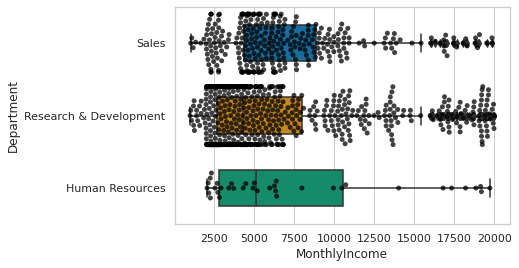

In [38]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers X


from matplotlib.cbook import boxplot_stats  

sns.set_style('whitegrid')
sns.boxplot(x = 'MonthlyIncome', y = 'Department', data=df, width=0.5,
                 palette="colorblind")

 
# add stripplot to boxplot with Seaborn
'''
sns.stripplot(y='Department', x='MonthlyIncome', 
                   data=df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
'''

sns.swarmplot(y='Department', x='MonthlyIncome', 
              data=df, 
              color='black',
              alpha=0.75)

boxplot_stats(df.MonthlyIncome).pop(0)['fliers']

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

<class 'pandas.core.series.Series'>


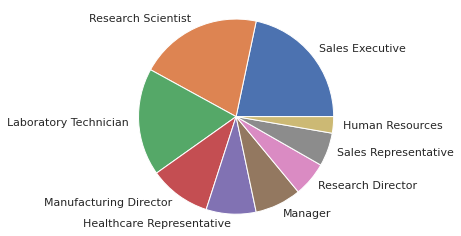

In [52]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 

df.head()
sizes = pd.value_counts(df["JobRole"])
print(type(sizes))
#print(sizes)
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=sizes.index)
ax1.axis('equal')
plt.show()


